In [3]:
#Importing Necessary Libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import date as dt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,PowerTransformer,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

import pickle
import warnings
warnings.filterwarnings('ignore')

**- Loading the Dataset.**

In [4]:
data = pd.read_csv('US Housing dataset.csv')
data.head()

,DATE,ASPUS_3A_PCT_CHG,H_RATIO_3A_PCT_CHG,HSN1F_3A_PCT_CHG,PERMIT_3A_PCT_CHG,STOCK_MKT_3A_PCT_CHG,BAA_YEILD_10Y_2A_PCT_CHG,US10Y_3A_PCT_CHG,RPCE_A_PCT_CHG,UEMP_3A_PCT_CHG,RGDP_M_PCT_CHG
0,1/1/1962,0.103627,0.170213,-0.086294,0.037433,-3.199388,-0.28,0.02451,-0.116279,-0.207031,-0.164384
1,2/1/1962,0.103627,0.170213,-0.086294,0.037433,-3.199388,-0.28,0.02451,-0.116279,-0.207031,-0.164384
2,3/1/1962,0.103627,0.170213,-0.086294,0.037433,-3.199388,-0.28,0.02451,-0.116279,-0.207031,-0.196721
3,4/1/1962,0.103627,0.170213,-0.086294,0.037433,-3.199388,-0.28,0.02451,-0.116279,-0.207031,-0.244898
4,5/1/1962,0.103627,0.170213,-0.086294,0.037433,-3.199388,-0.28,0.02451,-0.116279,-0.207031,0.117117


***
 - ASPUS_3A_PCT_CHG US Average housing price movement (3 years % change)
 - H_RATIO_3A_PCT_CHG Housing Ratio: Number of house available vs. sold. (3 years % change)
 - HSN1F_3A_PCT_CHG New 1F House sold (3 years % change)
 - PERMIT_3A_PCT_CHG Current construction permits across USA (3 years % change)
 - STOCK_MKT_3A_PCT_CHG Stock market movement (3 years % change)
 - BAA_YEILD_10Y_2A_PCT_CHG Bond Market movement (2 years % change)
 - US10Y_3A_PCT_CHG US 10 Years Treasury Rate (3 years % change)
 - RPCE_A_PCT_CHG Personal consumer expenditures (1 years % change)
 - UEMP_3A_PCT_CHG Long Term Unemployment Rate (3 years % change)
 - RGDP_M_PCT_CHG Current US GDP (3 years % change)

The output variable is ASPUS_3A_PCT_CHG
***

## EDA

**- Statistical Analysis.**

In [5]:
data.shape

(684, 11)

Shape of our dataset is 684 rows and 11 columns.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATE                      684 non-null    object 
 1   ASPUS_3A_PCT_CHG          684 non-null    float64
 2   H_RATIO_3A_PCT_CHG        684 non-null    float64
 3   HSN1F_3A_PCT_CHG          684 non-null    float64
 4   PERMIT_3A_PCT_CHG         684 non-null    float64
 5   STOCK_MKT_3A_PCT_CHG      684 non-null    float64
 6   BAA_YEILD_10Y_2A_PCT_CHG  684 non-null    float64
 7   US10Y_3A_PCT_CHG          684 non-null    float64
 8   RPCE_A_PCT_CHG            684 non-null    float64
 9   UEMP_3A_PCT_CHG           684 non-null    float64
 10  RGDP_M_PCT_CHG            684 non-null    float64
dtypes: float64(10), object(1)
memory usage: 58.9+ KB


Information of dataset:
- RangeIndex : 0 to 683
- Only DATE column is Object Dtype.
- No Null in dataset.

**- Descriptive Analysis.**

In [7]:
data.describe()

,ASPUS_3A_PCT_CHG,H_RATIO_3A_PCT_CHG,HSN1F_3A_PCT_CHG,PERMIT_3A_PCT_CHG,STOCK_MKT_3A_PCT_CHG,BAA_YEILD_10Y_2A_PCT_CHG,US10Y_3A_PCT_CHG,RPCE_A_PCT_CHG,UEMP_3A_PCT_CHG,RGDP_M_PCT_CHG
count,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000
mean,0.176616,0.068368,0.057349,0.082495,-0.890639,0.115461,0.004467,0.031227,0.029385,-0.059815
std,0.136273,0.380819,0.333475,0.398666,2.749769,0.543325,0.250976,1.186773,0.361224,0.526137
min,-0.155716,-0.565574,-0.698130,-0.749548,-9.815939,-0.546667,-0.573816,-5.550000,-0.387407,-3.160000
25%,0.103627,-0.161445,-0.132320,-0.188594,-2.193068,-0.280000,-0.159311,-0.468269,-0.231078,-0.244938
50%,0.164981,0.021568,0.051970,0.073897,-0.895975,-0.011667,-0.016687,-0.116279,-0.142044,-0.043681
75%,0.257386,0.170213,0.284603,0.271197,-0.008575,0.347867,0.146662,0.456603,0.263243,0.182197
max,0.530146,1.547619,1.093834,1.448519,9.609492,3.517241,0.774347,5.300000,1.256131,1.722222


Desribe:
- Shows the Count, Mean, St.deviation, minimum, 25%(1st Quartile), 50%(2nd Quartile), 75%(3rd Quartile), Maximum.

In [8]:
data.duplicated().sum()

0

No duplicated values present in the dataset.

In [9]:
data.isna().sum()

DATE                        0
ASPUS_3A_PCT_CHG            0
H_RATIO_3A_PCT_CHG          0
HSN1F_3A_PCT_CHG            0
PERMIT_3A_PCT_CHG           0
STOCK_MKT_3A_PCT_CHG        0
BAA_YEILD_10Y_2A_PCT_CHG    0
US10Y_3A_PCT_CHG            0
RPCE_A_PCT_CHG              0
UEMP_3A_PCT_CHG             0
RGDP_M_PCT_CHG              0
dtype: int64

No Null Values present in our dataset.

## Encoding

**- Encoding the object columns to int, Converting the Date formate to year and Using LabelEncoder to encode the column.**

**- LabelEncoder will encode the values based on label or encode the levels of categorical features into numeric values.**

In [10]:
data['DATE'] = pd.to_datetime(data['DATE'])
data['DATE'] = data['DATE'].dt.year

In [11]:
lb = LabelEncoder()
data['DATE'] = lb.fit_transform(data['DATE'])

In [12]:
data['DATE'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56])

- After encoding there are 0 - 56 uniques values present in Date Column.

## Visualization:

**- Univariate Analysis.**
In Univariate analysis is when only one variable/column is analyzed.

**Used sns.countplot, where it will show the count of data present in column, and also the range of data and 
counts.**

<AxesSubplot:xlabel='count', ylabel='DATE'>

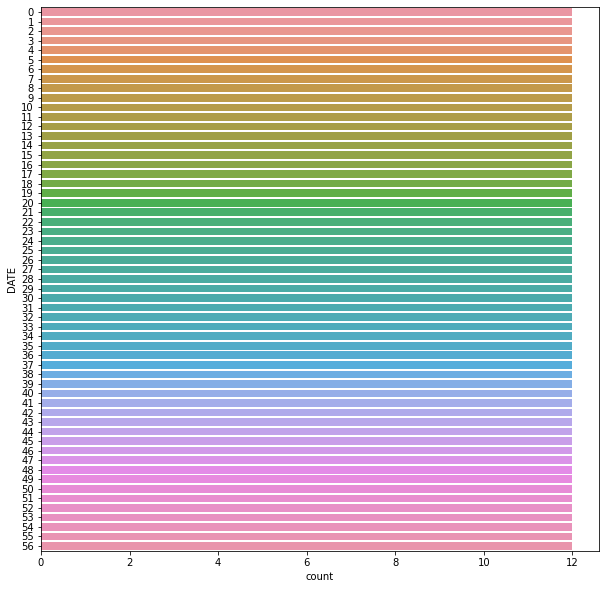

In [13]:
plt.figure(figsize = (10,10))
sns.countplot(y = data['DATE'])

<AxesSubplot:xlabel='H_RATIO_3A_PCT_CHG', ylabel='Count'>

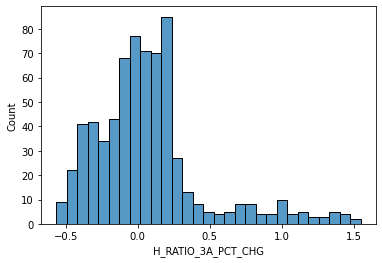

In [14]:
sns.histplot(data.H_RATIO_3A_PCT_CHG)

- The Range of H_RATIO_3A_PCT_CHG:Housing Ratio is -0.5 to 1.5
- Maximun data lies in 0.0 to 0.5

<AxesSubplot:xlabel='HSN1F_3A_PCT_CHG', ylabel='Count'>

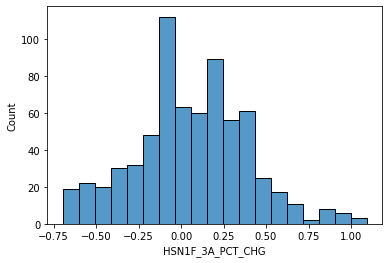

In [15]:
sns.histplot(data.HSN1F_3A_PCT_CHG)

- The Range of HSN1F_3A_PCT_CHG:New 1F House sold is -0.75 to 1.00
- Maximum data lies in -0.25 to 0.25

<AxesSubplot:xlabel='PERMIT_3A_PCT_CHG', ylabel='Count'>

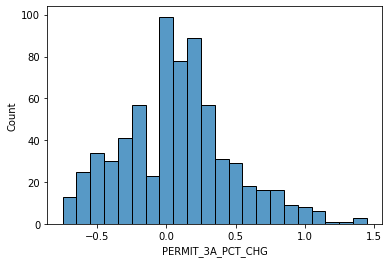

In [16]:
sns.histplot(data.PERMIT_3A_PCT_CHG)

- The Range of PERMIT_3A_PCT_CHG Current construction permits is 0.5 to 1.5
- Maximun data lies in 0.0 to 0.5

<AxesSubplot:xlabel='STOCK_MKT_3A_PCT_CHG', ylabel='Count'>

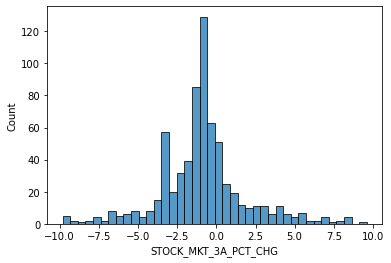

In [17]:
sns.histplot(data.STOCK_MKT_3A_PCT_CHG)

- STOCK_MKT_3A_PCT_CHG Stock market movement, ranges in between -10.0 to 10.0
- Maximum is -5.0 to 0.0
- Negative data is more.

<AxesSubplot:xlabel='BAA_YEILD_10Y_2A_PCT_CHG', ylabel='Count'>

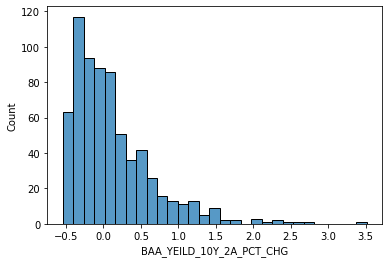

In [18]:
sns.histplot(data.BAA_YEILD_10Y_2A_PCT_CHG)

- BAA_YEILD_10Y_2A_PCT_CHG Bond Market movement: ranges in between -0.5. to 3.5
- Maximun is -0.5 to 0.5
- Positive data is more

<AxesSubplot:xlabel='US10Y_3A_PCT_CHG', ylabel='Count'>

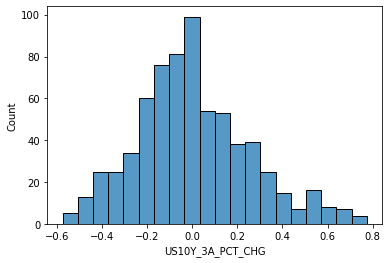

In [19]:
sns.histplot(data.US10Y_3A_PCT_CHG)

- US10Y_3A_PCT_CHG US 10 Years Treasury Rate, ranges between -0.6 to 0.8
- Maximum is -0.2 to 0.2

<AxesSubplot:xlabel='RPCE_A_PCT_CHG', ylabel='Count'>

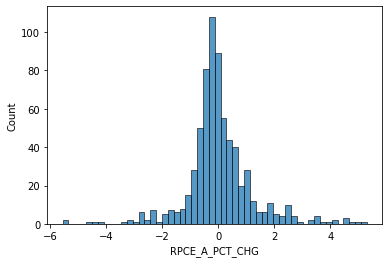

In [20]:
sns.histplot(data.RPCE_A_PCT_CHG)

- RPCE_A_PCT_CHG Personal consumer expenditures, ranges between -6 to 4
- Maximum is -2 to 2

<AxesSubplot:xlabel='UEMP_3A_PCT_CHG', ylabel='Count'>

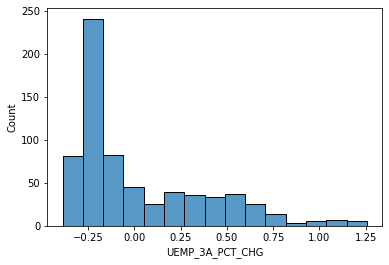

In [21]:
sns.histplot(data.UEMP_3A_PCT_CHG)

- UEMP_3A_PCT_CHG Long Term Unemployment Rate, ranges between -0.25 to 1.25
- Maximum is -0.25 to 0.00

<AxesSubplot:xlabel='RGDP_M_PCT_CHG', ylabel='Count'>

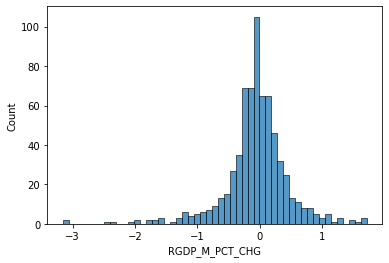

In [22]:
sns.histplot(data.RGDP_M_PCT_CHG)

- RGDP_M_PCT_CHG Current US GDP, ranges between -3 to 1
- Maximum is -1 to 1.

**- Bivariate Analysis.** In Bivariate analysis, when exactly two variables are analyzed.

**Used Regplot, where it will show the scatterplot as well shows the tend of the graph.**

In [23]:
def plot(x,y,data):
    sns.regplot(x,y,data=data)
    plt.xlabel(x)
    plt.ylabel(y)
    print('Scatterpot between',x,'and',y)
    plt.show()

Scatterpot between ASPUS_3A_PCT_CHG and H_RATIO_3A_PCT_CHG


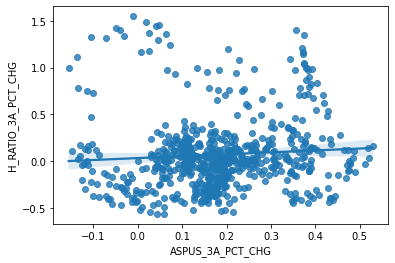

In [24]:
plot('ASPUS_3A_PCT_CHG','H_RATIO_3A_PCT_CHG',data = data)

Scatterpot between ASPUS_3A_PCT_CHG and HSN1F_3A_PCT_CHG


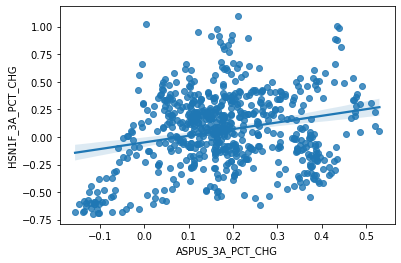

In [25]:
plot('ASPUS_3A_PCT_CHG','HSN1F_3A_PCT_CHG',data = data)

Scatterpot between ASPUS_3A_PCT_CHG and PERMIT_3A_PCT_CHG


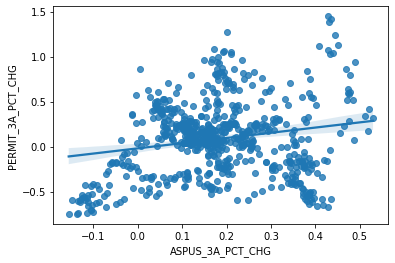

In [26]:
plot('ASPUS_3A_PCT_CHG','PERMIT_3A_PCT_CHG',data = data)

Scatterpot between ASPUS_3A_PCT_CHG and STOCK_MKT_3A_PCT_CHG


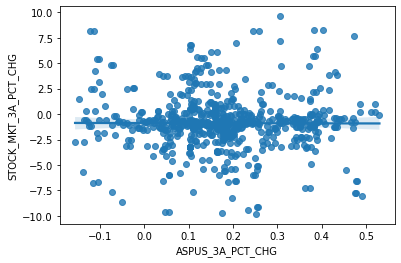

In [27]:
plot('ASPUS_3A_PCT_CHG','STOCK_MKT_3A_PCT_CHG',data = data)

Scatterpot between ASPUS_3A_PCT_CHG and BAA_YEILD_10Y_2A_PCT_CHG


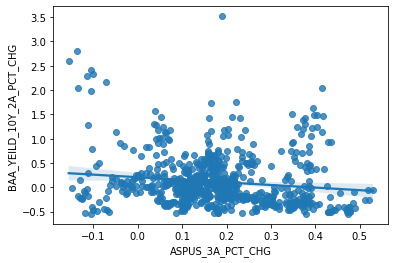

In [28]:
plot('ASPUS_3A_PCT_CHG','BAA_YEILD_10Y_2A_PCT_CHG',data = data)

Scatterpot between ASPUS_3A_PCT_CHG and US10Y_3A_PCT_CHG


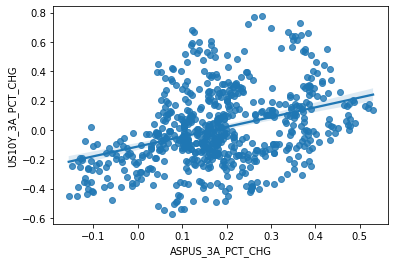

In [29]:
plot('ASPUS_3A_PCT_CHG','US10Y_3A_PCT_CHG',data = data)

Scatterpot between ASPUS_3A_PCT_CHG and RPCE_A_PCT_CHG


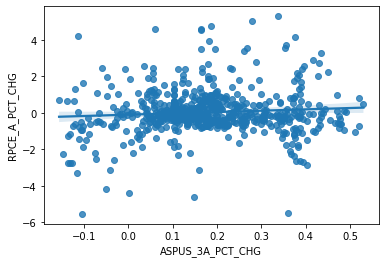

In [30]:
plot('ASPUS_3A_PCT_CHG','RPCE_A_PCT_CHG',data = data)

Scatterpot between ASPUS_3A_PCT_CHG and UEMP_3A_PCT_CHG


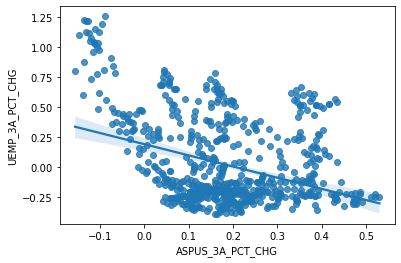

In [31]:
plot('ASPUS_3A_PCT_CHG','UEMP_3A_PCT_CHG',data = data)

Scatterpot between ASPUS_3A_PCT_CHG and RGDP_M_PCT_CHG


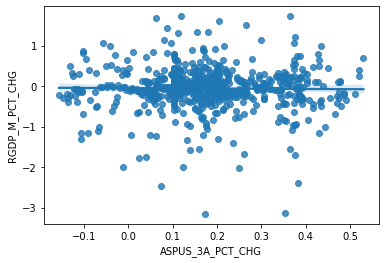

In [32]:
plot('ASPUS_3A_PCT_CHG','RGDP_M_PCT_CHG',data = data)

## Normal Distribtuion

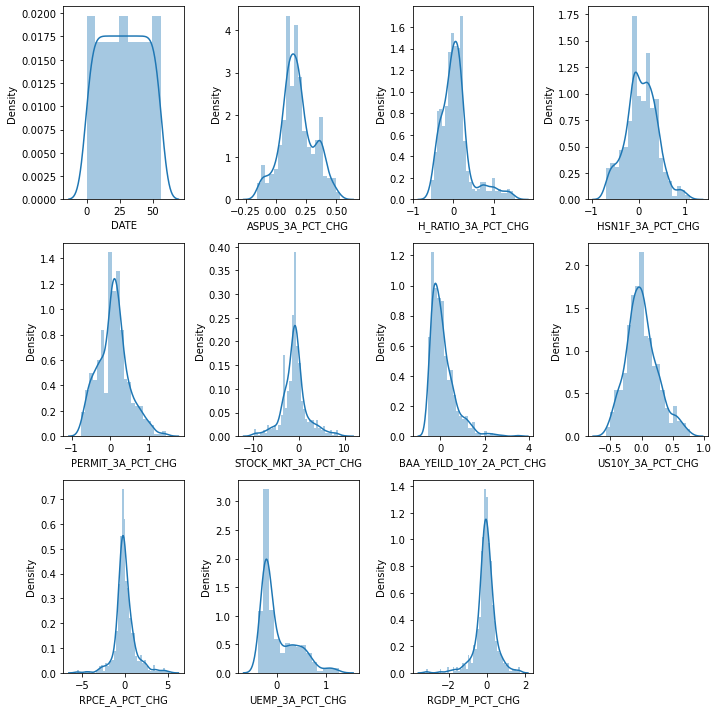

In [33]:
plt.figure(figsize=(10,10))
plotnumber = 1

for column in data:
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    
    plotnumber+=1
plt.tight_layout()

- Some Columns are skewed.
- And some columns are very close to normal distribution.

## Outliers Detection

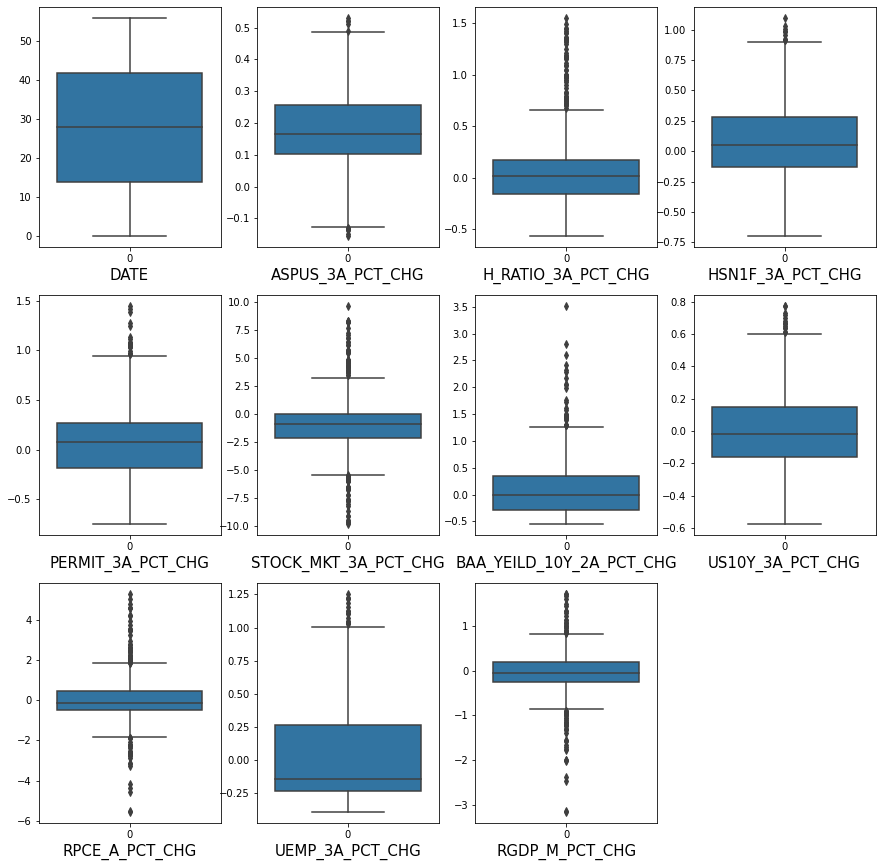

In [34]:
plt.figure(figsize = (15,15))
graph = 1
for column in data:
    if graph <= 12:
        plt.subplot(3,4,graph)
        ax = sns.boxplot(data = data[column])
        plt.xlabel(column, fontsize = 15)
    graph += 1
plt.show()

- Outliers, present in the dataset.
- Positive and Negative, both are there.

**- Removing Outliers using zscore.** Using Standard threshold value i.e. 3

In [35]:
z = np.abs(zscore(data))
z.shape

(684, 11)

In [36]:
threshold = 3
print(np.where(z>3))
len(np.where(z>3)[0])

(array([ 72,  73,  75,  76,  77,  98, 100, 104, 105, 123, 124, 131, 132,
       143, 143, 145, 147, 191, 192, 193, 200, 216, 217, 217, 218, 221,
       224, 227, 232, 235, 236, 236, 241, 243, 247, 250, 254, 255, 320,
       332, 359, 506, 535, 547, 548, 550, 551, 553, 554, 554, 555, 556,
       557, 557, 558, 559, 560, 560, 561, 561, 562, 562, 563, 564, 565,
       566, 567, 568, 570, 571, 572, 573, 574, 576, 577, 578, 579, 582,
       583, 583, 584, 614, 625, 627, 683]), array([ 6,  6,  5,  5,  5, 10, 10, 10, 10,  5,  5,  4,  3,  2, 10,  2, 10,
        4,  4,  4,  5,  5,  5, 10, 10,  6,  8,  8,  8,  7,  7, 10,  8, 10,
        8,  8,  8,  8,  8,  5,  8,  5, 10,  2,  2,  2, 10,  2,  2, 10,  2,
        2,  2, 10,  2,  2,  2,  8,  2,  6,  2,  6,  6,  6,  6,  6,  6,  6,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  5,  5,  8,  8,  5, 10,  8,  8]))


85

In [37]:
data_new = data[(z<3).all(axis = 1)]

In [38]:
print('Old Dataframe:',data.shape)
print('New Dataframe:',data_new.shape)

Old Dataframe: (684, 11)
New Dataframe: (608, 11)


In [39]:
loss_percentage = (684-608)/684*100
print(loss_percentage,'%')

11.11111111111111 %


- Afer removing the outliers from dataset, the loss of percent is 11%, which is fine not much data is deleted.

**- Powertransformation.** Using Yoe-Johnson method(can treat positive data and negative data) to remove skewness from dataset.

Skewed Columns

In [40]:
col = ['H_RATIO_3A_PCT_CHG','PERMIT_3A_PCT_CHG','BAA_YEILD_10Y_2A_PCT_CHG','RPCE_A_PCT_CHG','UEMP_3A_PCT_CHG','RGDP_M_PCT_CHG']

In [41]:
scaler = PowerTransformer(method = 'yeo-johnson')
data_new[col] = scaler.fit_transform(data_new[col].values)

## Correlation

**- Multivariate Analysis** Multivariate analysis is when more than two variables get analyzed.

**Used Heatplot map, where it will show the correlation between columns seperated by color and annot = True**

In [42]:
data_corr = data_new.corr()

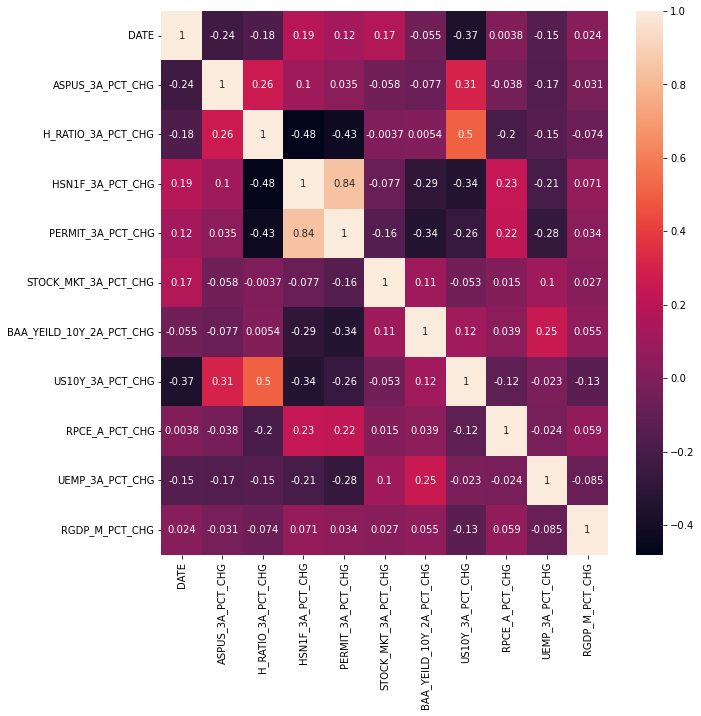

In [43]:
plt.figure(figsize = (10,10))
sns.heatmap(data_corr, annot = True)
plt.show()

**- There is no multicolinarity problem present in our dataset.**

## Final Dataset.

In [44]:
data_new

,DATE,ASPUS_3A_PCT_CHG,H_RATIO_3A_PCT_CHG,HSN1F_3A_PCT_CHG,PERMIT_3A_PCT_CHG,STOCK_MKT_3A_PCT_CHG,BAA_YEILD_10Y_2A_PCT_CHG,US10Y_3A_PCT_CHG,RPCE_A_PCT_CHG,UEMP_3A_PCT_CHG,RGDP_M_PCT_CHG
0,0,0.103627,0.614228,-0.086294,-0.158988,-3.199388,-0.805046,0.024510,-0.120649,-0.567410,-0.315437
1,0,0.103627,0.614228,-0.086294,-0.158988,-3.199388,-0.805046,0.024510,-0.120649,-0.567410,-0.315437
2,0,0.103627,0.614228,-0.086294,-0.158988,-3.199388,-0.805046,0.024510,-0.120649,-0.567410,-0.391253
3,0,0.103627,0.614228,-0.086294,-0.158988,-3.199388,-0.805046,0.024510,-0.120649,-0.567410,-0.503907
4,0,0.103627,0.614228,-0.086294,-0.158988,-3.199388,-0.805046,0.024510,-0.120649,-0.567410,0.352051
...,...,...,...,...,...,...,...,...,...,...,...
678,56,0.110410,0.742939,0.176699,0.084385,-1.431466,-0.849426,0.331797,0.303254,-0.820629,-0.099631
679,56,0.077628,0.301372,0.317982,0.018311,-1.431466,-0.879748,0.331797,-0.007277,-0.809536,-0.113103
680,56,0.045996,0.419779,0.279412,-0.002601,-2.993799,-0.814810,0.449275,-0.246782,-0.797920,-0.128860
681,56,0.042461,0.990348,0.089286,-0.250064,3.742159,-0.698727,0.393805,0.025494,-1.051520,-0.147539


## Model Building.

**- Seperating feature column and label column.**

In [45]:
x = data_new.drop('ASPUS_3A_PCT_CHG',axis = 1)
y = data_new.ASPUS_3A_PCT_CHG

**- Graph of features** Shows the correlation between features and target.

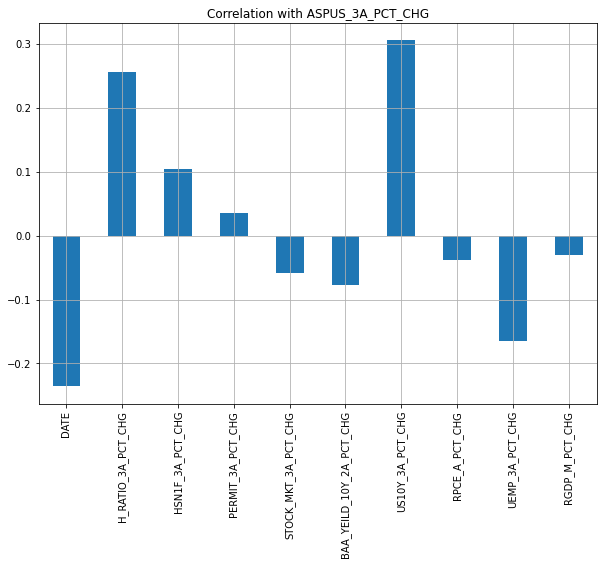

In [46]:
x.corrwith(y).plot(kind = 'bar',grid = True, figsize = (10,7), title = 'Correlation with ASPUS_3A_PCT_CHG')
plt.show()

- Every column is either positive related or negatively related to target column.

**- Scaling the Features.** Using StandardScaler to scale the feature, so every data will be treated equally and remove the units of data.

In [47]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

**- Train Test Split** For Model training and testing, where 25% of data is given for testing and rest is for training.

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, random_state = 90, test_size = 0.25)

**- Function for Training & Testing.**

In [49]:
def score(clas, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = clas.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('Accuracy Score:', metrics.r2_score(y_train,y_pred))
    
    elif train == False:
        pred = clas.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('Accuracy Score:', metrics.r2_score(y_test,pred))
        print('\n ----- Model Evaluation ----- \n')
        print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
        print('Mean Squared Error',mean_squared_error(y_test,pred))
        print('\n')
        plt.scatter(y_test,pred)
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title("Actual VS Prediction")
        plt.show()

**- Model Instantiatin.**

In [50]:
lr = LinearRegression()
rfr = RandomForestRegressor()
ada = AdaBoostRegressor()
knn = KNeighborsRegressor()
gb = GradientBoostingRegressor()
svr = SVR()
dt = DecisionTreeRegressor()

**- Linear Regression.**


 ----- Train Result ----- 

Accuracy Score: 0.21294050214988347

 ----- Test Result ----- 

Accuracy Score: 0.28716773489802794

 ----- Model Evaluation ----- 

Mean Absolute Error: 0.09247179780323879
Mean Squared Error 0.012118228380491794




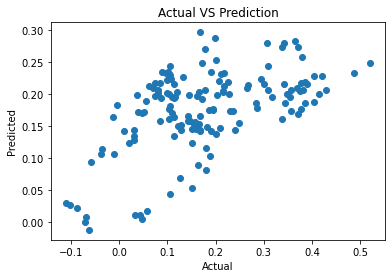

In [64]:
lr.fit(x_train,y_train)
score(lr, x_train,x_test,y_train,y_test,train = True)
score(lr, x_train,x_test,y_train,y_test,train = False)

**- RandomForest Regressorom.**


 ----- Train Result ----- 

Accuracy Score: 0.9926586106967096

 ----- Test Result ----- 

Accuracy Score: 0.9463758936506587

 ----- Model Evaluation ----- 

Mean Absolute Error: 0.019527302189736844
Mean Squared Error 0.0009116158165878468




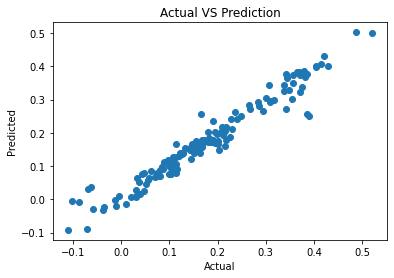

In [52]:
rfr.fit(x_train,y_train)
score(rfr, x_train,x_test,y_train,y_test,train = True)
score(rfr, x_train,x_test,y_train,y_test,train = False)

**- GradientBoosting Regressor**


 ----- Train Result ----- 

Accuracy Score: 0.9781291416531193

 ----- Test Result ----- 

Accuracy Score: 0.9211170883042953

 ----- Model Evaluation ----- 

Mean Absolute Error: 0.027860549586834978
Mean Squared Error 0.0013410183377571584




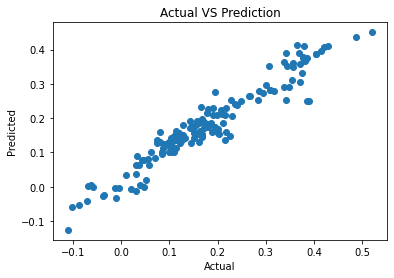

In [84]:
gb.fit(x_train,y_train)
score(gb, x_train,x_test,y_train,y_test,train = True)
score(gb, x_train,x_test,y_train,y_test,train = False)

**- DecisionTree Regressor.**


 ----- Train Result ----- 

Accuracy Score: 1.0

 ----- Test Result ----- 

Accuracy Score: 0.877568056795396

 ----- Model Evaluation ----- 

Mean Absolute Error: 0.028332121092105263
Mean Squared Error 0.002081356753132592




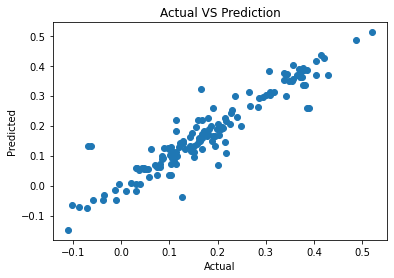

In [54]:
dt.fit(x_train,y_train)
score(dt, x_train,x_test,y_train,y_test,train = True)
score(dt, x_train,x_test,y_train,y_test,train = False)

**- AdaBoost Regressor**


 ----- Train Result ----- 

Accuracy Score: 0.8436807919582818

 ----- Test Result ----- 

Accuracy Score: 0.8095953649566687

 ----- Model Evaluation ----- 

Mean Absolute Error: 0.0468089538074151
Mean Squared Error 0.0032369001308171787




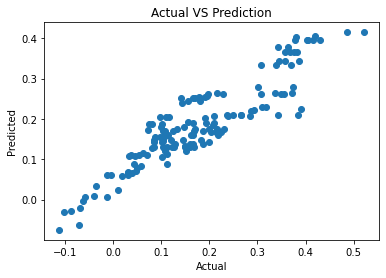

In [55]:
ada.fit(x_train,y_train)
score(ada, x_train,x_test,y_train,y_test,train = True)
score(ada, x_train,x_test,y_train,y_test,train = False)

**- Support Vector Regressor**


 ----- Train Result ----- 

Accuracy Score: 0.6585094019891975

 ----- Test Result ----- 

Accuracy Score: 0.5313321174379266

 ----- Model Evaluation ----- 

Mean Absolute Error: 0.07583988522710157
Mean Squared Error 0.007967406518385164




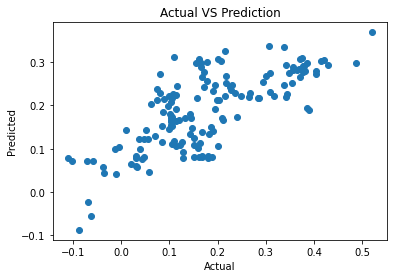

In [56]:
svr.fit(x_train,y_train)
score(svr, x_train,x_test,y_train,y_test,train = True)
score(svr, x_train,x_test,y_train,y_test,train = False)

        Among all the Regressor Model, 
        - The best Model is GradientBoostingRegressor Model.
                - Which is giving us the best score of 92.1%
                - Mean Absolute Error: 2%
                - Mean Squared Error: 0.1%
                - Root Mean Squared Error: 3%

## Hyperparameter Tuning.

In [57]:
param = {"n_estimators": [10, 20, 50, 100, 200, 300],
         "max_depth": [2,3,4,5,7],
         "max_leaf_nodes": [2, 5, 10, 20],
         "learning_rate": [0.01,0.1,0.001]}

In [58]:
grid = GridSearchCV(gb, param_grid = param)
grid.fit(x_train,y_train)
print('Best Params = ',grid.best_params_)

Best Params =  {'learning_rate': 0.1, 'max_depth': 7, 'max_leaf_nodes': 20, 'n_estimators': 300}


In [85]:
gb_hyp = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 7, max_leaf_nodes = 20, n_estimators = 300)


 ----- Train Result ----- 

Accuracy Score: 0.9999948493322712

 ----- Test Result ----- 

Accuracy Score: 0.9499150254994453

 ----- Model Evaluation ----- 

Mean Absolute Error: 0.019903424069972003
Mean Squared Error 0.0008514501785942671




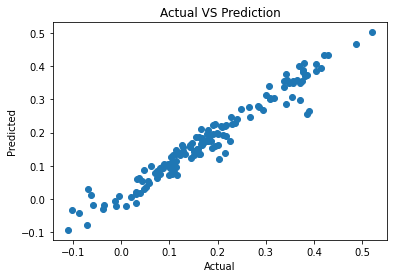

In [86]:
gb_hyp.fit(x_train,y_train)
score(gb_hyp, x_train,x_test,y_train,y_test,train = True)
score(gb_hyp, x_train,x_test,y_train,y_test,train = False)

        Post Tuning result is better, score increased after tuning the parameter.
        So, Finalizing this parameters for final model.

**- Testing on manual entered data.**

In [61]:
data.head()

,DATE,ASPUS_3A_PCT_CHG,H_RATIO_3A_PCT_CHG,HSN1F_3A_PCT_CHG,PERMIT_3A_PCT_CHG,STOCK_MKT_3A_PCT_CHG,BAA_YEILD_10Y_2A_PCT_CHG,US10Y_3A_PCT_CHG,RPCE_A_PCT_CHG,UEMP_3A_PCT_CHG,RGDP_M_PCT_CHG
0,0,0.103627,0.170213,-0.086294,0.037433,-3.199388,-0.28,0.02451,-0.116279,-0.207031,-0.164384
1,0,0.103627,0.170213,-0.086294,0.037433,-3.199388,-0.28,0.02451,-0.116279,-0.207031,-0.164384
2,0,0.103627,0.170213,-0.086294,0.037433,-3.199388,-0.28,0.02451,-0.116279,-0.207031,-0.196721
3,0,0.103627,0.170213,-0.086294,0.037433,-3.199388,-0.28,0.02451,-0.116279,-0.207031,-0.244898
4,0,0.103627,0.170213,-0.086294,0.037433,-3.199388,-0.28,0.02451,-0.116279,-0.207031,0.117117


In [74]:
print('ASPUS_3A_PCT_CHG:- ', gb_hyp.predict(scaler.transform([[0, 0.503074,0.086294,0.05562,3.199388,0.837634,0.02451,0.085278,0.642513,0.265517]])))

ASPUS_3A_PCT_CHG:-  [0.10908882]


    So, GradientBoosting Regressor with tuned parameter is working great.

## Saving the model.

In [87]:
filename = 'US_Housing.pkl'
pickle.dump(gb_hyp, open(filename, 'wb'))